The data for the project is taken from kaggle https://www.kaggle.com/datasets/mostafaabla/garbage-classification.

In the working directory I created a folder data with three empty directories train, val and test.

Run the python notebook sequentially.

[forthebadge](https://forthebadge.com)

In [5]:
import os
import glob
import random
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
!pip install split-folders

In [7]:
import splitfolders

In [115]:
#os.chdir('..')
os.getcwd()
os.listdir()

['.virtual_documents', '__notebook_source__.ipynb', 'data', 'sudFirstTry.h5']

In [112]:
os.chdir('..')

In [114]:
os.chdir('working')

In [40]:
os.getcwd()
os.chdir('data')

In [ ]:
os.mkdir('train')
os.mkdir('test')
os.mkdir('val')

In [109]:
os.chdir('/kaggle/input')
input_folder = r'../input/garbage-classification/garbage_classification'


In [46]:
os.chdir('..')
print(os.getcwd())
os.listdir()

/


['bin',
 'var',
 'mnt',
 'etc',
 'root',
 'home',
 'tmp',
 'lib',
 'sbin',
 'proc',
 'lib64',
 'srv',
 'boot',
 'opt',
 'sys',
 'media',
 'lib32',
 'usr',
 'run',
 'libx32',
 'dev',
 'data',
 'test',
 'kaggle',
 'train',
 'val',
 '.dockerenv',
 '.jupyter',
 'src',
 'libnvinfer8_8.0.0-1+cuda11.0_amd64.deb',
 'run_jupyter.sh',
 'entrypoint.sh',
 'NGC-DL-CONTAINER-LICENSE']

In [47]:
os.chdir('kaggle/working')
splitfolders.ratio(input_folder, output = 'data', seed = 42, ratio = (.7,.2,.1), group_prefix = None)

Copying files: 15515 files [02:02, 126.20 files/s]


In [49]:
train_path = 'data/train'
valid_path = 'data/val'

**Checking the number of images in the training set and validation set**

In [50]:
len(os.listdir(train_path + '/cardboard'))

623

In [52]:
len(os.listdir(train_path + '/green-glass'))

440

In [53]:
len(os.listdir(train_path + '/paper'))

735

In [54]:
len(os.listdir(train_path + '/plastic'))

605

In [55]:
len(os.listdir(train_path + '/trash'))

487

In [56]:
len(os.listdir(train_path + '/metal'))

538

In [57]:
len(os.listdir(valid_path + '/metal'))

153

**Plotting the images**

Copying files: 0 files [05:05, ? files/s]


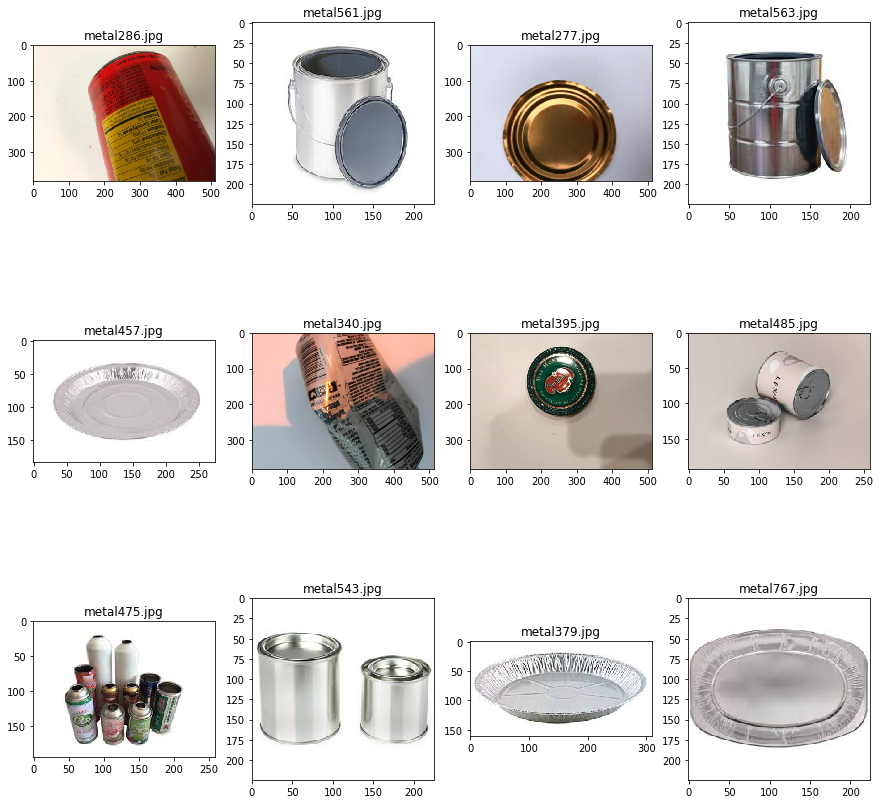

In [58]:
## Displaying the first 12 images of metal from the training set

fig = plt.figure(figsize = (15,15))
columns = 4
rows = 3
i = 1

for img_name in os.listdir(train_path+'/metal'):
    img = train_path + '/metal' +'/'+ img_name
    img = plt.imread(img)
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(img, interpolation = 'nearest')
    ax.title.set_text(img_name)
    i = i+1
    if i == columns*rows+1:
        break
    
plt.show()

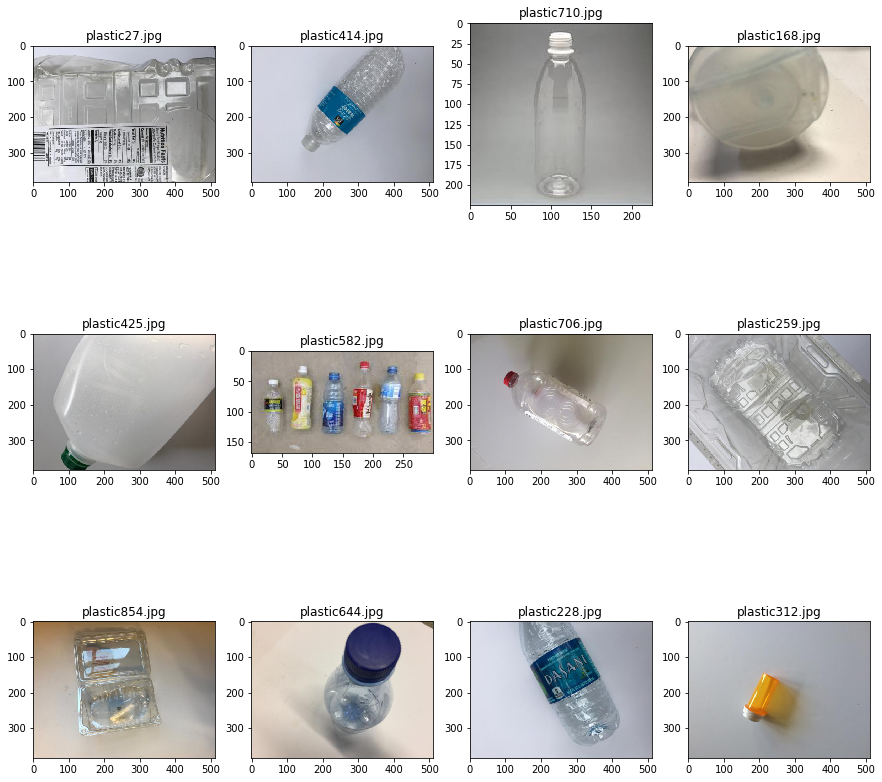

In [59]:
## Displaying the first 12 images of plastic from the training set

fig = plt.figure(figsize = (15,15))
columns = 4
rows = 3
i = 1

for img_name in os.listdir(train_path+'/plastic'):
    img = train_path + '/plastic/' + img_name
    img = plt.imread(img)
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(img, interpolation = 'nearest')
    ax.title.set_text(img_name)
    i = i+1
    if i == columns*rows+1:
        break
    
plt.show()

**Checking the dimension for each image**

In [60]:
images = os.listdir(train_path + '/metal/')

In [61]:
width, height = [], []

for image_name in images:
    img = plt.imread(train_path+ '/metal/' + image_name)
    w, h, c = img.shape
    width.append(w)
    height.append(h)

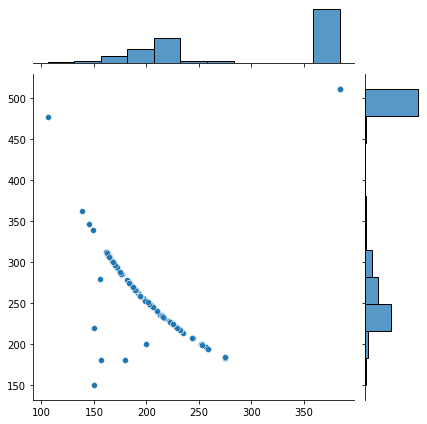

In [62]:
sns.jointplot( x = width, y = height, kind = 'scatter')
plt.show()

**The images are of varying dimensions, so we will recale to the mean height and width**

In [63]:
import numpy as np

print('Mean width: {}'.format(np.mean(width)))

print('Mean Height: {}'.format(np.mean(height)))

Mean width: 298.52044609665427
Mean Height: 384.2156133828996


We will keep the size of the image as (298*384 x 3)

In [64]:
IMAGE_SIZE = (298, 384, 3)

**Checking images are scaled or not**

In [65]:
img_name = os.listdir(train_path + '/metal')[0]
img = plt.imread(train_path+'/metal/'+img_name)

print('Maximum pizel value: {}'.format(np.max(img)))

print('Minimum pizel value: {}'.format(np.min(img)))

## Image is not scaled

Maximum pizel value: 255
Minimum pizel value: 0


**Creating Image Data Generator for Training and Validation set**

In [66]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 20,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [79]:
train_batches = train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (298, 384),
                                                 classes = ['cardboard', 'metal','paper','plastic','trash','green-glass','white-glass','brown-glass','clothes','biological','battery','shoes'],
                                                 batch_size = 10,
                                                 shuffle = True, class_mode = 'categorical')

valid_batches = valid_datagen.flow_from_directory(directory = valid_path,
                                                 target_size = (298, 384),
                                                 classes = ['cardboard', 'metal','paper','plastic','trash','green-glass','white-glass','brown-glass','clothes','biological','battery','shoes'],
                                                 batch_size = 10,
                                                 shuffle = False, class_mode = 'categorical')

Found 10854 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.


In [80]:
train_batches.class_indices

{'cardboard': 0,
 'metal': 1,
 'paper': 2,
 'plastic': 3,
 'trash': 4,
 'green-glass': 5,
 'white-glass': 6,
 'brown-glass': 7,
 'clothes': 8,
 'biological': 9,
 'battery': 10,
 'shoes': 11}

**Let us see how the traing batch looks like**

In [81]:
imgs, labels = next(train_batches) ## getting first 10 images (1st batch)

## Everytime this line of code is run next 10 images are selected

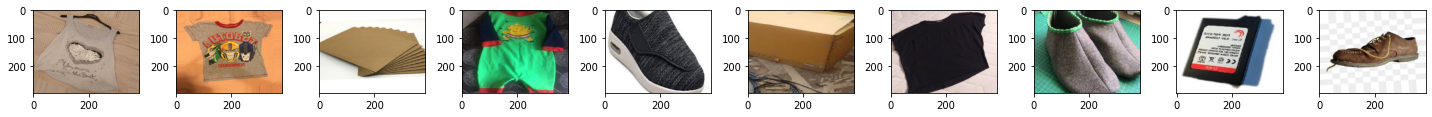

In [82]:
fig, axes = plt.subplots(1, 10, figsize = (20,20))
axes = axes.flatten()
for img, ax in zip(imgs, axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

In [83]:
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [84]:
img = imgs[0]

print('Maximum pixel value: {}'.format(np.max(img)))

print('Minimum pixel value: {}'.format(np.min(img)))

Maximum pixel value: 1.0
Minimum pixel value: 0.00042498059337958694


Note how the image size and maximum and minimum pixel value are changed

Now the images are rescaled!!

**Building CNN model**

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.callbacks import EarlyStopping

In [85]:
model = Sequential()

model.add(Convolution2D(filters = 128, kernel_size =  (3,3), input_shape = (298,384,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(Convolution2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 12 , activation = 'softmax'))

In [86]:
model.compile(optimizer = 'adam' ,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 296, 382, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 148, 191, 128)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 189, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 94, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 92, 64)        73792     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 69, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 45, 64)       

In [88]:
r = model.fit(train_batches,
                        steps_per_epoch = len(train_batches),
                        epochs = 10,
                        validation_data = valid_batches,
                        validation_steps = len(valid_batches),
                        callbacks = EarlyStopping(monitor='val_loss', patience = 2))

Epoch 1/10
1086/1086 [==============================] - 288s 264ms/step - loss: 1.7311 - accuracy: 0.4362 - val_loss: 1.3063 - val_accuracy: 0.5597
Epoch 2/10
1086/1086 [==============================] - 289s 266ms/step - loss: 1.3490 - accuracy: 0.5494 - val_loss: 1.1596 - val_accuracy: 0.6126
Epoch 3/10
1086/1086 [==============================] - 285s 263ms/step - loss: 1.2217 - accuracy: 0.5959 - val_loss: 1.1474 - val_accuracy: 0.6397
Epoch 4/10
1086/1086 [==============================] - 286s 263ms/step - loss: 1.1546 - accuracy: 0.6174 - val_loss: 1.0963 - val_accuracy: 0.6429
Epoch 5/10
1086/1086 [==============================] - 285s 262ms/step - loss: 1.0761 - accuracy: 0.6469 - val_loss: 0.9346 - val_accuracy: 0.6829
Epoch 6/10
1086/1086 [==============================] - 288s 265ms/step - loss: 1.0322 - accuracy: 0.6623 - val_loss: 1.1240 - val_accuracy: 0.6255
Epoch 7/10
1086/1086 [==============================] - 286s 263ms/step - loss: 1.0127 - accuracy: 0.6726 - val_

In [89]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

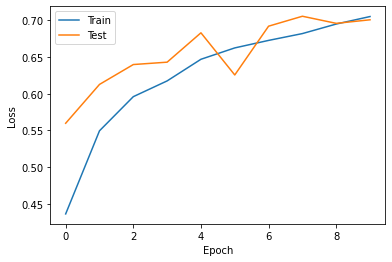

In [90]:
plt.plot(r.history['accuracy'], label = 'Train')
plt.plot(r.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
model.evaluate(train_batches)
#train_batches.classes

1086/1086 [==============================] - 262s 242ms/step - loss: 0.8248 - accuracy: 0.7301


[0.824796199798584, 0.7301455736160278]

In [116]:
model.evaluate(valid_batches)

310/310 [==============================] - 13s 41ms/step - loss: 0.9304 - accuracy: 0.7006


[0.9303774237632751, 0.7006451487541199]

In [ ]:
train_pred = model.predict(train_batches)

In [ ]:
train_classes_pred = np.argmax(train_pred, axis = 1)

In [ ]:
train_classes_pred

In [ ]:
train_classes_actual = train_batches.classes

In [ ]:
train_classes_actual

In [105]:
from sklearn.utils.multiclass import type_of_target
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [118]:
valid_classes = model.predict(valid_batches)
valid_classes_pred = np.argmax(valid_classes, axis = 1)
valid_classes_actual = valid_batches.classes
cm = confusion_matrix(valid_classes_actual, valid_classes_pred)
print(train_batches.class_indices)
#print(cm)
print(f"Accuracy: {accuracy_score(valid_classes_actual, valid_classes_pred)}")

{'cardboard': 0, 'metal': 1, 'paper': 2, 'plastic': 3, 'trash': 4, 'green-glass': 5, 'white-glass': 6, 'brown-glass': 7, 'clothes': 8, 'biological': 9, 'battery': 10, 'shoes': 11}
Accuracy: 0.7006451612903226


[Text(0, 0.5, 'cardboard'),
 Text(0, 1.5, 'metal'),
 Text(0, 2.5, 'paper'),
 Text(0, 3.5, 'plastic'),
 Text(0, 4.5, 'trash'),
 Text(0, 5.5, 'green-glass'),
 Text(0, 6.5, 'white-glass'),
 Text(0, 7.5, 'brown-glass'),
 Text(0, 8.5, 'clothes'),
 Text(0, 9.5, 'biological'),
 Text(0, 10.5, 'battery'),
 Text(0, 11.5, 'shoes')]

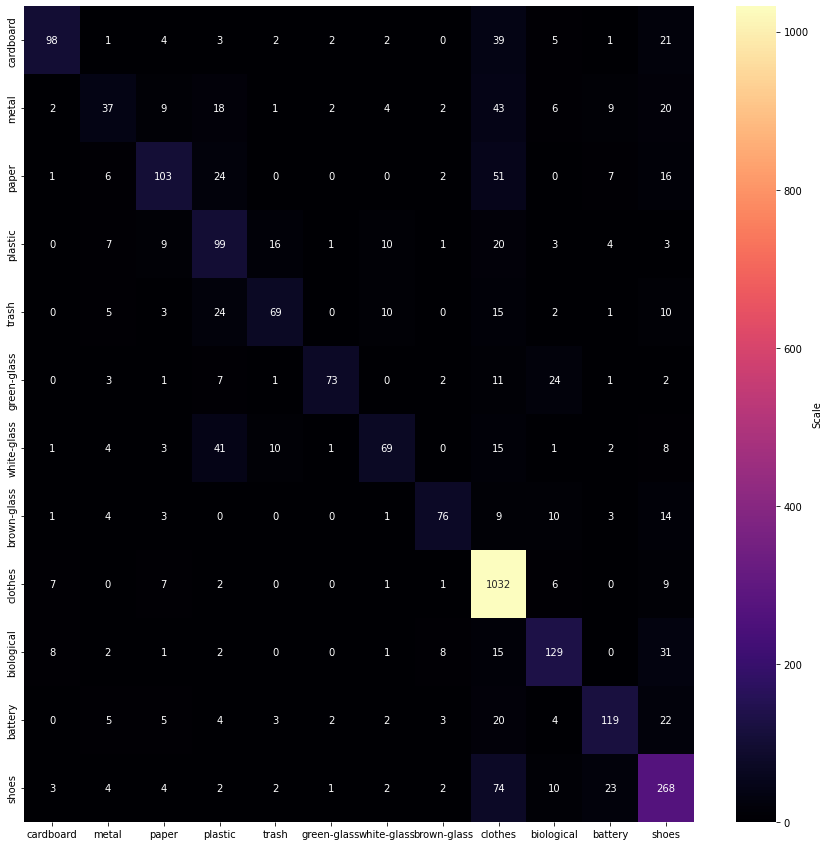

In [119]:
sns.color_palette("magma", as_cmap=True)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cm, annot=True, cmap="magma", fmt='d', cbar_kws={'label': 'Scale'})
labels=list(train_batches.class_indices.keys())
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

In [107]:
model.save('sudFirstTry.h5')

In [108]:
from IPython.display import FileLink
FileLink(r'sudFirstTry.h5')

/kaggle/working/sudFirstTry.h5